# What's in the box?

You have one box with three balls. One ball is red, one ball is blue and the third ball is either red or blue (50% probability). You pick one red ball out of the boc (without returning it). What's the probability of picking a blue ball next?

In [3]:
import random

In [4]:
def pick_order():
    # Get the color of the third ball
    third_ball = random.choice([True, False])

    # We have three balls marked as red or not red
    balls = [True, False, third_ball]
    
    random.shuffle(balls)
    return balls

Let's run the experiment several times

In [5]:
runs = list()
for i in range(10):
    runs.append(pick_order())

Now, select only those runs where the first pick was red

In [6]:
first_pick_red_runs = [run for run in runs if run[0]]
first_pick_red_runs

[[True, False, False],
 [True, False, True],
 [True, False, True],
 [True, True, False],
 [True, False, False]]

So, what's the probabily of picking a non-red ball next?

In [7]:
len([run for run in first_pick_red_runs if not run[1]])/len(first_pick_red_runs)

0.8

## To make it look nicer and see how it changes when increasing the number of experiments...

In [20]:
def experiment(n=100):
    runs = list()
    for i in range(n):
        runs.append(pick_order())
    
    first_pick_red_runs = [run for run in runs if run[0]]
    if len(first_pick_red_runs): 
        return len([run for run in first_pick_red_runs if not run[1]])/len(first_pick_red_runs)
    else:
        # Just in case there were no valid cases
        return 0

In [9]:
experiment(100)

0.6

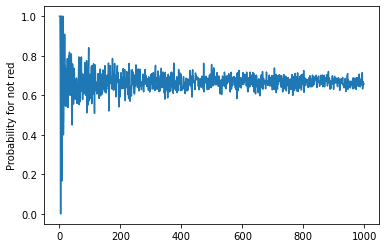

Average probability is 0.667
Computation took 1.3 seconds


In [25]:
import matplotlib.pyplot as plt

# It's good to know how long it takes
import time
start_time = time.time()

data = [experiment(n) for n in range(1, 1000)]
plt.plot(data)
plt.ylabel('Probability for not red')
plt.show()

print('Average probability is {:.3f}'.format((sum(data)/len(data))))
print('Computation took {:.1f} seconds'.format((time.time() - start_time)))